## PCA using Sklearn

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [9]:
df = load_iris()
X = df.data[:, :2]

In [10]:
# Standarize
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [11]:
pca = PCA(n_components=2)
pca.fit(X)


PCA(n_components=2)

In [12]:
print("Eigenvectors: \n", pca.components_)
print("Eigenvalues: \n", pca.explained_variance_)
print("Mean: \n", pca.mean_)

Eigenvectors: 
 [[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]
Eigenvalues: 
 [1.12507025 0.88835257]
Mean: 
 [-1.69031455e-15 -1.84297022e-15]


(np.float64(-2.0881263006455923),
 np.float64(2.7101213689229993),
 np.float64(-2.7101832614184658),
 np.float64(3.367011367809801))

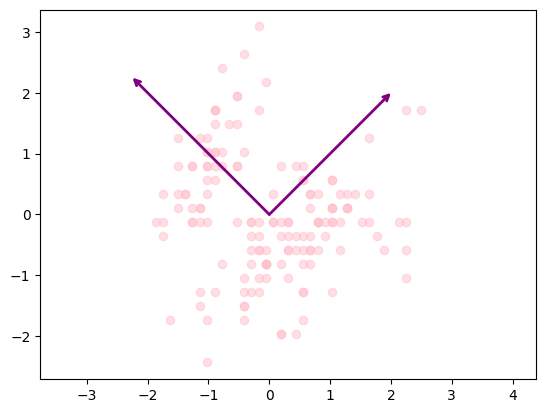

In [15]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle = '->',
                  linewidth=2,
                  shrinkA=0,
                  shrinkB=0,
                  color='purple')
    
    ax.annotate('', v1, v0, arrowprops=arrowprops)

plt.scatter(X[:, 0], X[:, 1], alpha=0.5, color='pink')
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_+v)

plt.axis('equal')    

### PCA as Dimensionality Reduction

In [16]:
pca = PCA(n_components=1)

In [18]:
pca.fit(X)
X_pca = pca.transform(X)

In [19]:
print("Original Shape: ", X.shape)
print("transformed shape: ", X_pca.shape)

Original Shape:  (150, 2)
transformed shape:  (150, 1)


In [20]:
y = np.zeros(X_pca.shape[0])

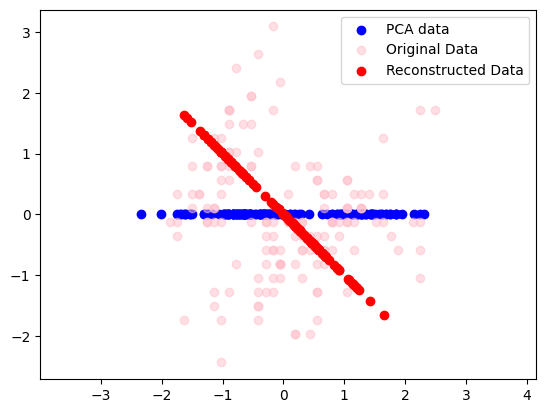

In [23]:
plt.scatter(X_pca[:, 0], y, color='blue', label="PCA data")
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], color="pink", alpha=0.5, label="Original Data")
plt.scatter(X_new[:, 0], X_new[:, 1], color='red', label="Reconstructed Data")
plt.axis('equal')
plt.legend()